# Plotting phase differences (circular plots)

---

We start by importing the necessary packages:

In [8]:
from thebeat import Sequence
from thebeat.visualization import plot_phase_differences
from thebeat.utils import get_phase_differences
import numpy as np
import pandas as pd
%matplotlib inline

## Example 1: Compare random data with isochronous sequence

---

First we take a look at what the behind-the-scenes data looks like, the phase differences themselves, here represented as degrees.

In [10]:
# We create a random number generator with a seed so you get the same output as we.
rng = np.random.default_rng(seed=123)

# Create a random sequence
seq = Sequence.generate_random_normal(n=10, mu=500, sigma=50, rng=rng)

# Get and print the phase differences
phase_diffs = get_phase_differences(seq, 500, circular_unit="degrees")
print(phase_diffs)

[323.2274285  305.78920662 357.42179853   4.4140786   34.45715861
  55.21714682  37.90347652  52.17376897  41.36226461]


---

So what does it look like in a circular histogram?

/Users/jellevanderwerff/thebeat-package/thebeat/visualization.py:309: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


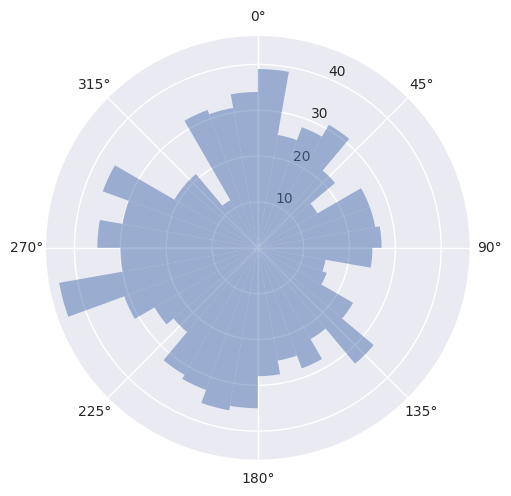

In [11]:
seq = Sequence.generate_random_normal(n=1000, mu=500, sigma=50, rng=rng)

plot_phase_differences(test_sequence=seq, reference_sequence=500);

## Example 2: Finger-tapping data

---

In [12]:
# Load the dataset
df = pd.read_csv('sampjit_sampledata.csv')

# Take a quick look at the data
print(df.head(5))

  sequence_id  pp_id  condition  length  tempo  variance  interval_i  \
0        1_13      1  jittering      25    400       0.2           4   
1        1_13      1  jittering      25    400       0.2           5   
2        1_13      1  jittering      25    400       0.2           6   
3        1_13      1  jittering      25    400       0.2           7   
4        1_13      1  jittering      25    400       0.2           8   

     stim_ioi  resp_iti  
0  488.360885    329.32  
1  302.385354    384.55  
2  378.198490    497.05  
3  448.052241    400.91  
4  418.512601    378.41  


---

In [13]:
stimuli = []
responses = []

# We loop over the sequence id's
for seq_id in df.sequence_id.unique():
    # We get the relevant piece of the dataframe for that sequence id
    df_piece = df.loc[df['sequence_id'] == seq_id]
    
    # We create a Sequence object for the stimulus and the response
    stimulus = Sequence(iois=df_piece.stim_ioi)
    response = Sequence(iois=df_piece.resp_iti)
    
    # Add them to the lists
    stimuli.append(stimulus)
    responses.append(response)


Now we're ready to plot. 

/Users/jellevanderwerff/thebeat-package/thebeat/utils.py:66: Warning: The first onset of the test sequence was at t=0.
This would result in a phase difference that is always 0, which is not very informative.
As such, the first onset was discarded.
If you want the first onset at a different time than zero, use the Sequence.from_onsets() method to create the Sequence object.
  warnings.warn(phases_t_at_zero)
/Users/jellevanderwerff/thebeat-package/thebeat/visualization.py:309: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


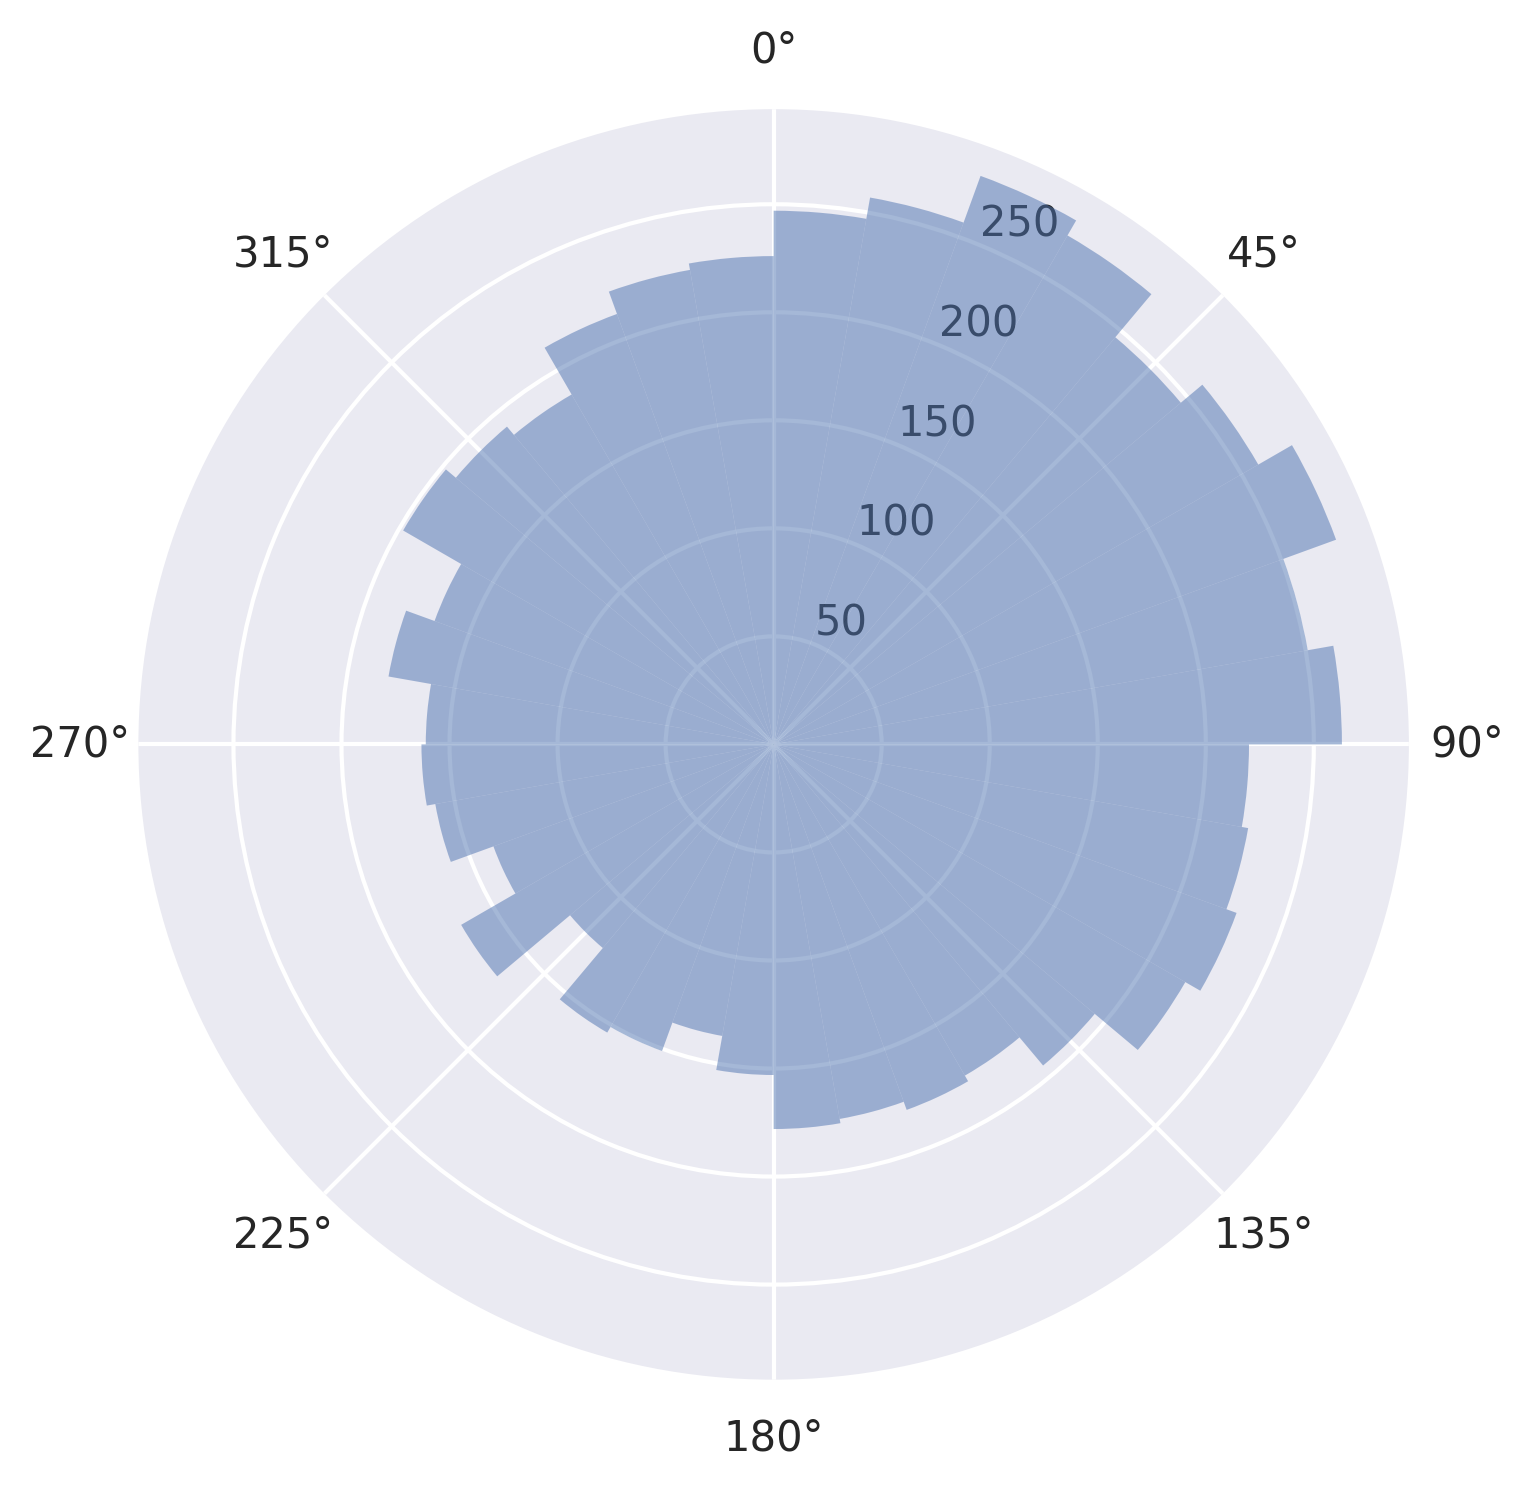

In [14]:
plot_phase_differences(stimuli, responses, dpi=300);

Say we want to change the x axis labels, we can do that as follows:

/Users/jellevanderwerff/thebeat-package/thebeat/utils.py:66: Warning: The first onset of the test sequence was at t=0.
This would result in a phase difference that is always 0, which is not very informative.
As such, the first onset was discarded.
If you want the first onset at a different time than zero, use the Sequence.from_onsets() method to create the Sequence object.
  warnings.warn(phases_t_at_zero)
/Users/jellevanderwerff/thebeat-package/thebeat/visualization.py:309: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/lp/b5jvvgsj5rxdd7kkdd08mdy00000gn/T/ipykernel_47803/497046374.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0.125, 0.25, 0.375, '-0.5/0.5', -0.375, -0.25, -0.125])
/var/folders/lp/b5jvvgsj5rxdd7kkdd08mdy00000gn/T/ipykernel_47803/497046374.py:6: UserWarning: Matplotlib is currently using modul

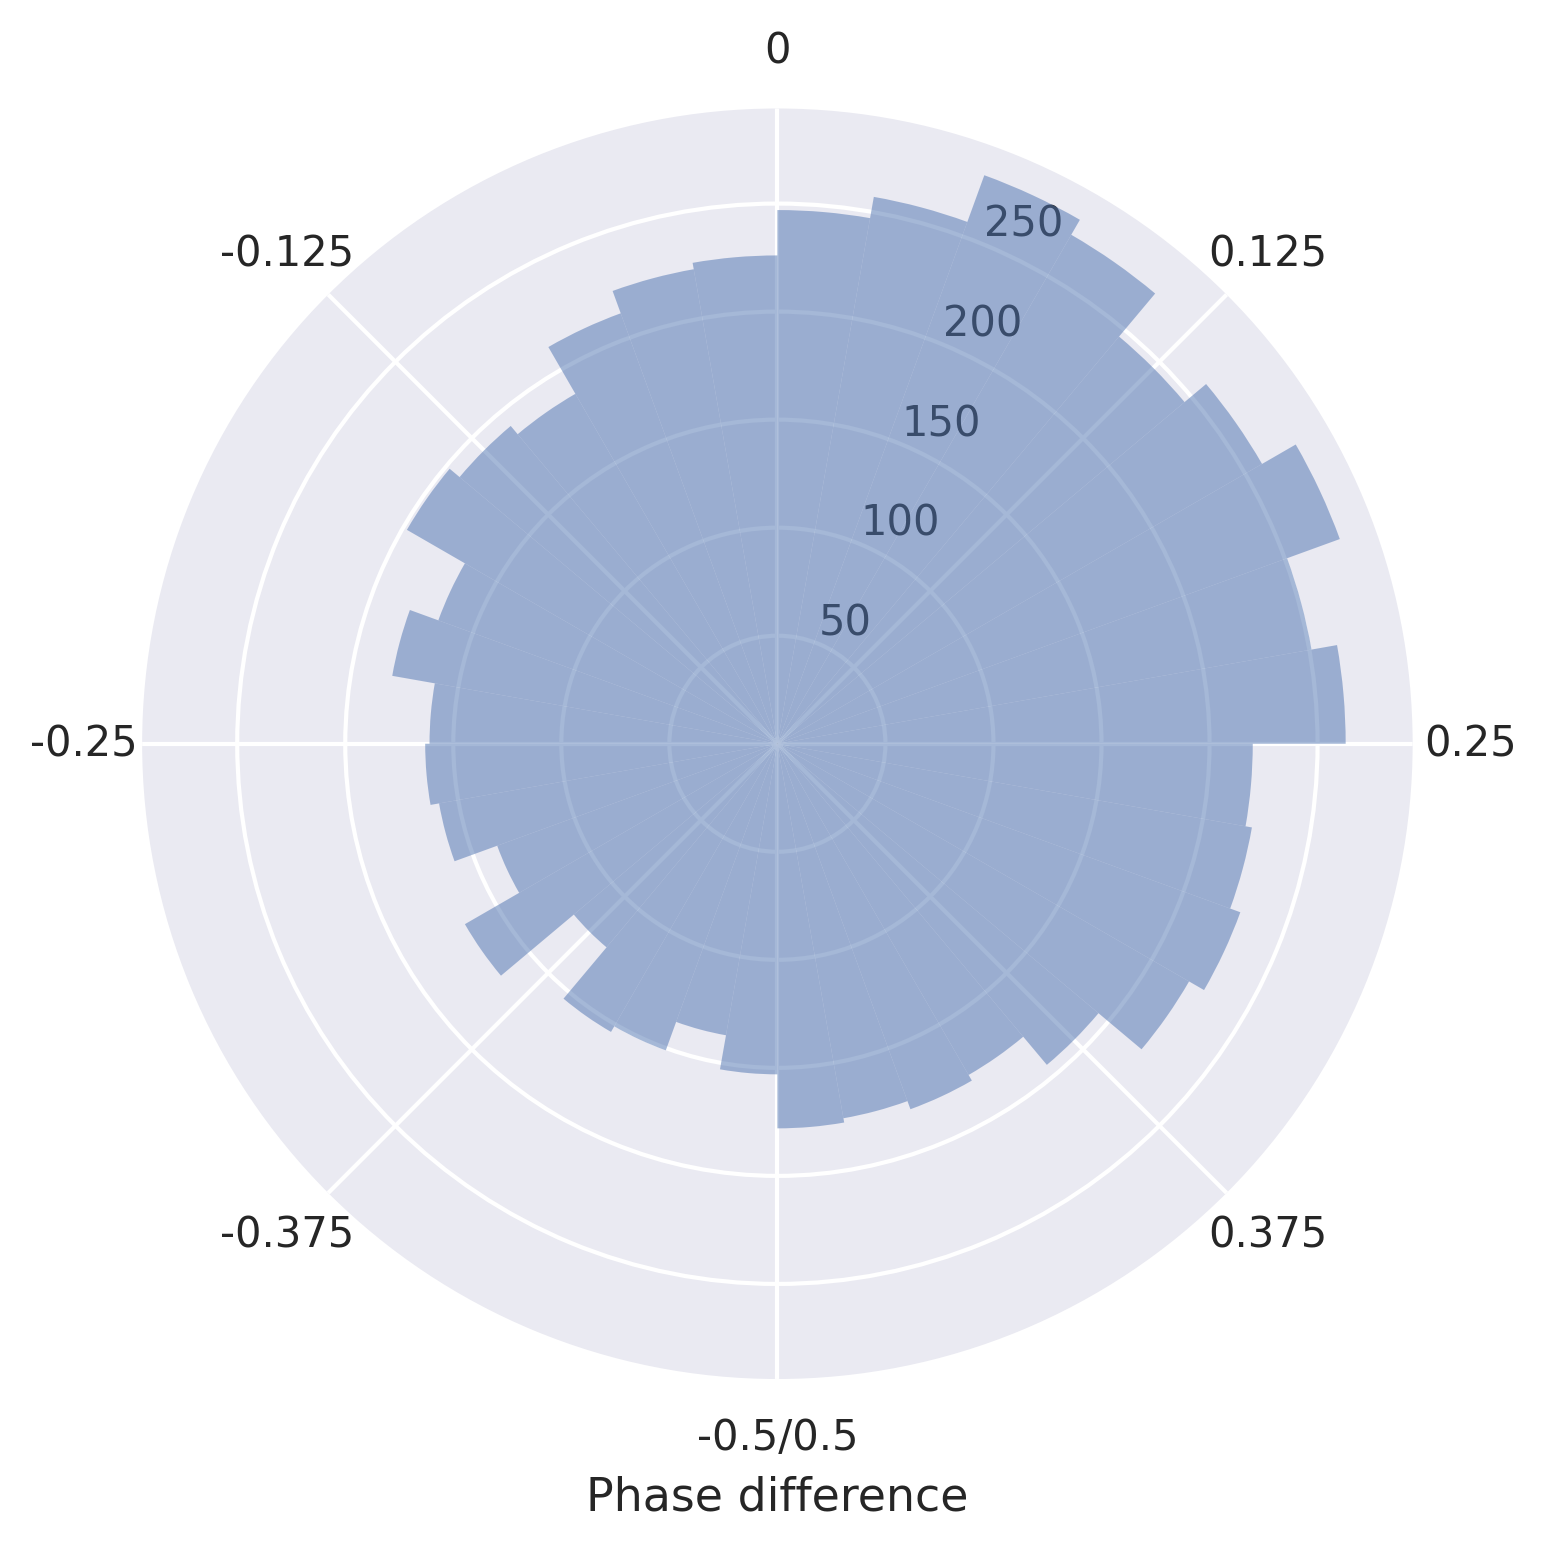

In [15]:
fig, ax = plot_phase_differences(stimuli, responses, dpi=300)

ax.set_xticklabels([0, 0.125, 0.25, 0.375, '-0.5/0.5', -0.375, -0.25, -0.125])
ax.set_xlabel('Phase difference')

fig.show()